In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import math
import sys
from scipy.stats import spearmanr

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
impIterative = IterativeImputer(missing_values=np.nan, sample_posterior=True, imputation_order='random')

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import time
start = time.time()
full_dataset = pd.read_pickle("./full_dataset.pkl")
end = time.time()
print(f'Elapsed Time: {(end-start)} seconds')

Elapsed Time: 23.139150142669678 seconds


In [3]:
full_dataset

,CHILDID,PARENTID,S1_ID,S2_ID,S3_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,S6_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,0001001C,0001001P,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001002C,0001002P,1.0,1.0,NaN,6005.0,6005.0,6005.0,6005.0,A053,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,0001003C,0001003P,1.0,1.0,NaN,9997.0,9997.0,9997.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001004C,0001004P,1.0,1.0,NaN,6009.0,6009.0,6009.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001005C,0001005P,1.0,1.0,NaN,3.0,7197.0,7197.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116024C,3116024P,3116.0,3116.0,NaN,3116.0,7294.0,7294.0,7294.0,3116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,5213040C,5213040P,NaN,NaN,NaN,5213.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,5245040C,5245040P,NaN,NaN,NaN,5245.0,5245.0,5245.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,5245041C,5245041P,NaN,NaN,NaN,5245.0,5245.0,5245.0,5245.0,A290,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Determining the Best Y-Variable

In [4]:
new_dataset = full_dataset.copy()

In [5]:
dtypes = new_dataset.dtypes
columns = new_dataset.columns

In [6]:
column_names = []

for c in columns:
    if (str(dtypes[c]) != 'float64'):
        column_names.append(c)

new_dataset = new_dataset.drop(columns=column_names)

In [7]:
new_dataset

,S1_ID,S2_ID,S3_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,D2T_ID,D4T_ID,D5T_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,6005.0,6005.0,6005.0,6005.0,NaN,-2.0,-2.0,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,1.0,1.0,NaN,9997.0,9997.0,9997.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,6009.0,6009.0,6009.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,3.0,7197.0,7197.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116.0,3116.0,NaN,3116.0,7294.0,7294.0,7294.0,-2.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,NaN,NaN,NaN,5213.0,NaN,NaN,NaN,NaN,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,NaN,NaN,NaN,5245.0,5245.0,5245.0,NaN,NaN,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,NaN,NaN,NaN,5245.0,5245.0,5245.0,5245.0,NaN,-2.0,-2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Removing columns with high NaNs

In [8]:
def remove_highest_empties(df):
    empty_limit = len(df) * 0.60
    column_names = []
    
    for column_name, _ in df.iteritems():
        if (df[column_name].isna().sum() > empty_limit):
            column_names.append(column_name)
    
    df = df.drop(columns=column_names)
    return df

In [9]:
new_dataset = remove_highest_empties(new_dataset)
new_dataset

,S1_ID,S2_ID,S4_ID,S5_ST_ID,S5_ID,S6_ST_ID,D4T_ID,D5T_ID,D6T_ID,D7T_ID,...,C7CPTS81,C7CPTS82,C7CPTS83,C7CPTS84,C7CPTS85,C7CPTS86,C7CPTS87,C7CPTS88,C7CPTS89,C7CPTS90
0,1.0,1.0,2.0,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,6005.0,6005.0,6005.0,6005.0,-2.0,-2.0,-2.0,-2.0,...,2704.86,2681.98,2700.63,2697.53,2692.50,2665.01,2844.28,2665.86,2764.51,2720.46
2,1.0,1.0,9997.0,9997.0,9997.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,6009.0,6009.0,6009.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,3.0,7197.0,7197.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,3116.0,3116.0,3116.0,7294.0,7294.0,7294.0,-2.0,-2.0,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21405,NaN,NaN,5213.0,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21406,NaN,NaN,5245.0,5245.0,5245.0,NaN,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21407,NaN,NaN,5245.0,5245.0,5245.0,5245.0,-2.0,-2.0,-2.0,-2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Determining the Correlation Between Values

In [10]:
def find_correlation(df, column_name):
    df_column = df[column_name]
    correlation_dict = {}
    
    for col in new_dataset.columns:
        current_column = new_dataset[col]
        correlation = df_column.corr(current_column)
        correlation_dict[col] = correlation_dict.get(col, correlation)
    
    correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index')
    return correlation_df

In [11]:
def find_highest_correlation(df):
    result_df = df.copy()
    result_df = result_df.T
    
    result_df = result_df.iloc[:, (df >= 0.2).to_numpy()]
    
    return result_df.round(3)

In [12]:
C7_Math_corr = find_correlation(new_dataset, 'C7R4MPF')

In [13]:
C7_Math_corr = find_highest_correlation(C7_Math_corr)

In [14]:
C7_Math_corr

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,C7R4MNR8,C7R4MSCL,C7R4MTSC,C7R4MPF,C7R4MPB1,C7R4MPB2,C7R4MPB3,C7R4MPB4,C7R4MPB5,C7R4MPB6,C7R4MPB7,C7R4MPB8,C7R4MPB9,C7R4MSET,C7MTHFLG
0,0.21,0.21,0.212,0.226,0.23,0.235,0.324,0.345,1.0,0.24,0.24,0.24,0.24,0.255,0.292,0.321,0.335,0.371,0.243,0.24


### Remove the variable relating to 8th Grade

In [15]:
def remove_unusable_variables(df):
    unusable_columns = []
    
    for column_name, _ in df.iteritems():
        if ('7' in column_name) or ('8' in column_name):
            if (column_name != 'C7R4MPF'):
                unusable_columns.append(column_name)
    
    df = df.drop(columns=unusable_columns)
    return df

In [16]:
C7_Math_corr = remove_unusable_variables(C7_Math_corr)
C7_Math_corr

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,C7R4MPF
0,0.21,0.21,0.212,0.226,0.23,1.0


## Creating a new dataset from the columns with the highest correlation

In [17]:
columns = C7_Math_corr.columns

In [18]:
dataset = new_dataset[columns]

In [19]:
dataset.shape

(21409, 6)

In [20]:
# Number of Non-NA values in each column
dataset.count()

C5R4MSCL    14415
C5R4MTSC    14415
C6R4MNR5    11294
C6R4MSCL    11294
C6R4MTSC    11294
C7R4MPF      9307
dtype: int64

In [21]:
# Number of NA values in each column
dataset.isna().sum()

C5R4MSCL     6994
C5R4MTSC     6994
C6R4MNR5    10115
C6R4MSCL    10115
C6R4MTSC    10115
C7R4MPF     12102
dtype: int64

In [22]:
dataset.groupby('C7R4MPF').size()

C7R4MPF
-9.0     315
 3.0      52
 4.0     127
 5.0     577
 6.0    1943
 7.0    2755
 8.0    1990
 9.0    1548
dtype: int64

In [23]:
cleandf=dataset.copy().dropna(subset=["C7R4MPF"])

In [24]:
cleandf.shape

(9307, 6)

In [25]:
cleandf.isna().sum()

C5R4MSCL    346
C5R4MTSC    346
C6R4MNR5    401
C6R4MSCL    401
C6R4MTSC    401
C7R4MPF       0
dtype: int64

In [26]:
print(cleandf.groupby('C7R4MPF').size())

C7R4MPF
-9.0     315
 3.0      52
 4.0     127
 5.0     577
 6.0    1943
 7.0    2755
 8.0    1990
 9.0    1548
dtype: int64


In [27]:
dataset= cleandf[cleandf["C7R4MPF"]>5]
print(dataset.groupby('C7R4MPF').size())

C7R4MPF
6.0    1943
7.0    2755
8.0    1990
9.0    1548
dtype: int64


In [28]:
dataset.shape

(8236, 6)

In [29]:
# Group some categories together
conditions = [
    (dataset['C7R4MPF'] >= 6.0) & (dataset['C7R4MPF'] <= 7.0),
    (dataset['C7R4MPF'] >= 8.0) & (dataset['C7R4MPF'] <= 9.0)]
choices = ['C - Low', 'A - High']
scores = np.select(conditions, choices)
dataset.loc[:, 'Score'] = scores
dataset

C:\Users\ekech\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,C7R4MPF,Score
1,124.61,60.390,16.0,152.24,62.585,9.0,A - High
6,71.98,40.946,6.0,107.99,44.830,6.0,C - Low
7,NaN,NaN,NaN,NaN,NaN,9.0,A - High
9,110.49,54.986,13.0,134.90,54.759,7.0,C - Low
15,115.59,56.872,12.0,133.67,54.259,8.0,A - High
...,...,...,...,...,...,...,...
21384,69.28,39.743,6.0,110.19,45.571,6.0,C - Low
21391,76.32,42.763,6.0,86.01,37.654,6.0,C - Low
21399,82.09,44.991,7.0,117.81,48.231,6.0,C - Low
21407,82.69,45.215,6.0,99.32,41.989,7.0,C - Low


In [30]:
#remove the C6R4MPF column, now that we have the 'Score' category 
dataset=dataset.drop('C7R4MPF', axis=1)
dataset.head()

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,Score
1,124.61,60.390,16.0,152.24,62.585,A - High
6,71.98,40.946,6.0,107.99,44.830,C - Low
7,NaN,NaN,NaN,NaN,NaN,A - High
9,110.49,54.986,13.0,134.90,54.759,C - Low
15,115.59,56.872,12.0,133.67,54.259,A - High


In [31]:
print(dataset.groupby('Score').size())

Score
A - High    3538
C - Low     4698
dtype: int64


In [32]:
sample_size = math.floor(0.80*len(dataset))
sample_size

6588

In [33]:
# Creating our sample of random lines
traindf=dataset.sample(n=sample_size)
#Listing what rows our sample is using
traindf.index

Int64Index([12519,  3551, 19039,  3168,  5821, 14140,  1935, 19058, 18615,
             8456,
            ...
             6077,  4323, 14422, 18778, 16598, 18732, 11485,  9871,   828,
            19561],
           dtype='int64', length=6588)

In [34]:
# Printing training dataset which imputation will be performed on
traindf

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,Score
12519,151.20,72.479,17.0,155.58,64.402,A - High
3551,124.20,60.227,12.0,136.36,55.356,A - High
19039,103.36,52.453,13.0,143.46,58.393,C - Low
3168,127.38,61.514,14.0,144.67,58.936,A - High
5821,104.88,52.984,14.0,140.26,56.995,C - Low
...,...,...,...,...,...,...
18732,107.14,53.781,15.0,137.85,55.976,C - Low
11485,92.88,48.833,9.0,108.70,45.066,C - Low
9871,85.51,46.243,13.0,131.63,53.444,A - High
828,118.64,58.037,12.0,139.96,56.869,A - High


In [35]:
# Defining our validation data as rows in dataset2 that are not in our training data
validationdf=dataset.drop(traindf.index)
len(validationdf)

1648

In [36]:
# taking out all NA's from validation dataset
validationdf=validationdf.dropna()
len(validationdf)

1556

In [37]:
columns = columns.drop('C7R4MPF')

In [38]:
# Do imputation on ALL columns of TRAIN 
X = traindf[columns]

In [39]:
X

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC
12519,151.20,72.479,17.0,155.58,64.402
3551,124.20,60.227,12.0,136.36,55.356
19039,103.36,52.453,13.0,143.46,58.393
3168,127.38,61.514,14.0,144.67,58.936
5821,104.88,52.984,14.0,140.26,56.995
...,...,...,...,...,...
18732,107.14,53.781,15.0,137.85,55.976
11485,92.88,48.833,9.0,108.70,45.066
9871,85.51,46.243,13.0,131.63,53.444
828,118.64,58.037,12.0,139.96,56.869


In [40]:
data_imputed=pd.DataFrame(impIterative.fit_transform(X),columns=columns)

In [41]:
data_imputed

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC
0,151.20,72.479,17.0,155.58,64.402
1,124.20,60.227,12.0,136.36,55.356
2,103.36,52.453,13.0,143.46,58.393
3,127.38,61.514,14.0,144.67,58.936
4,104.88,52.984,14.0,140.26,56.995
...,...,...,...,...,...
6583,107.14,53.781,15.0,137.85,55.976
6584,92.88,48.833,9.0,108.70,45.066
6585,85.51,46.243,13.0,131.63,53.444
6586,118.64,58.037,12.0,139.96,56.869


In [42]:
len(data_imputed)

6588

In [43]:
#Create a new column in data_imputed that doesn't exist yet to tack on the y-variable
data_imputed["Score"]=traindf['Score'].values

In [44]:
data_imputed

,C5R4MSCL,C5R4MTSC,C6R4MNR5,C6R4MSCL,C6R4MTSC,Score
0,151.20,72.479,17.0,155.58,64.402,A - High
1,124.20,60.227,12.0,136.36,55.356,A - High
2,103.36,52.453,13.0,143.46,58.393,C - Low
3,127.38,61.514,14.0,144.67,58.936,A - High
4,104.88,52.984,14.0,140.26,56.995,C - Low
...,...,...,...,...,...,...
6583,107.14,53.781,15.0,137.85,55.976,C - Low
6584,92.88,48.833,9.0,108.70,45.066,C - Low
6585,85.51,46.243,13.0,131.63,53.444,A - High
6586,118.64,58.037,12.0,139.96,56.869,A - High


In [45]:
dtypes = data_imputed.dtypes

In [46]:
dtypes[(dtypes != "float64")]

Score    object
dtype: object

In [47]:
data_imputed.shape

(6588, 6)

In [48]:
print(data_imputed.groupby('Score').size())

Score
A - High    2858
C - Low     3730
dtype: int64


In [49]:
# Split-out train dataset
array = data_imputed.values
X_train = array[:,0:-1]
Y_train= array[:,-1]
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [50]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=100000, multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier(criterion='gini', n_estimators=100, n_jobs=2)))

In [51]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.806922 (0.008943)
LDA: 0.803280 (0.010150)
KNN: 0.766395 (0.009281)
CART: 0.727534 (0.020697)
NB: 0.788708 (0.008142)
SVM: 0.806010 (0.010283)
RF: 0.775806 (0.009685)


In [52]:
#Set validation set
X_validation=validationdf.iloc[:,0:-1]
Y_validation=validationdf.iloc[:,-1]

In [53]:
# Make predictions on validation dataset with SVM
 
model = SVC(gamma='scale')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

0.820694087403599
              precision    recall  f1-score   support

    A - High       0.79      0.77      0.78       646
     C - Low       0.84      0.86      0.85       910

    accuracy                           0.82      1556
   macro avg       0.82      0.81      0.81      1556
weighted avg       0.82      0.82      0.82      1556



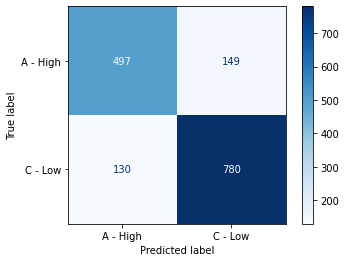

In [54]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
plot_confusion_matrix(model.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions))

In [55]:
# Make predictions on validation dataset with RF
 
model2 = LogisticRegression(max_iter=100000, multi_class='multinomial')
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_validation)

0.8187660668380463
              precision    recall  f1-score   support

    A - High       0.78      0.79      0.78       646
     C - Low       0.85      0.84      0.84       910

    accuracy                           0.82      1556
   macro avg       0.81      0.81      0.81      1556
weighted avg       0.82      0.82      0.82      1556



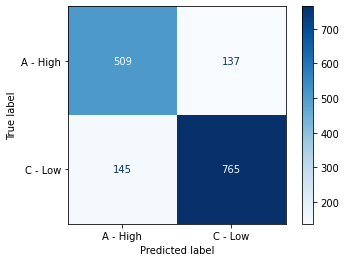

In [56]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions2))
plot_confusion_matrix(model2.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions2))